# 5장 회귀(Regression)

## 회귀 소개

- 회귀는 현대 통계학을 이루는 큰 축
- 회귀 분석은 유전적 특성을 연구하던 영국의 통계학자 갈톤(Galton)이 수행한 연구에서 유래했다는 것이 일반론
- 회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법

### 회귀(Regression) 개요
- 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭합니다.
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것입니다.

### 회귀의 유형
- 회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있습니다. 
    - 선형회귀와 비선형 회귀
        - 선형 회귀 : 회귀계수가 선형으로 결합(ex : w0 + w1x1+ w2x2 + ...)
        - 비선형 회귀 : 회귀계수가 비선형으로 결합(ex : (w0/(w1+w2))* x...)
    - 독립변수의 개수
        - 단일 회귀 : 독립 변수가 1개
        - 다중 회귀 : 독립 변수가 여러 개

### 선형 휘귀의 종류
- 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, **규제(Regularization)를 적용하지 않은 모델**입니다.
- 릿지(Ridge) : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델입니다.
- 라쏘(Lasso) : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식입니다.
- 엘라스틱넷(ElasticNet) : L2, L1규제를 함께 결합한 모델입니다.
- 로지스틱 회귀(Logistic Regression) : 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델입니다.

### 단순 선형 회귀(Simple Regression)를 통한 회귀의 이해
- 주택 가격이 주택의 크기로만 결정되는 단순 선형 회귀로 가정하면 다음과 같이 주택가격은 주택 크기에 대해 선형(직선 형태)의 관계로 표현할 수 있습니다.
- 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 **잔차(오류 값) 합이 최소가 되는 모델**을 만든다는 의미입니다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 됩니다.

### RSS의 이해
- RSS는 변수 $W_{0}$, $W_{1}$인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 $W_{0}$과 $W_{1}$, 즉 회귀계수를 학습을 통해서 찾는것이 머신러닝 기반 회귀의 핵심 사항입니다.
- RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 **$w$ 변수(회귀 계수)가 중심 변수**임을 인지하는 것이 매우 중요합니다.(학습데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 **상수**로 간주합니다.)
- 일반적으로 RSS는 **학습 데이터의 건수**로 나누어서 다음과 같이 정규화된 식으로 표현됩니다.
- 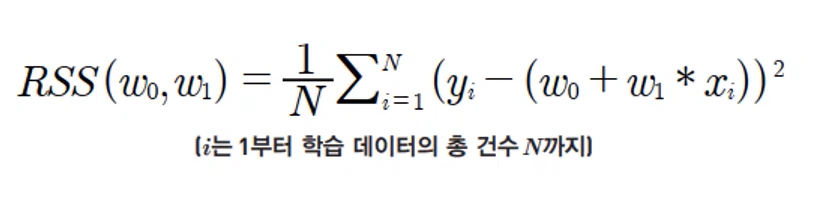

### RSS - 회귀의 비용 함수
- 비용 함수(Cost Function) : RSS는 비용(Cost)이며, $w$ 변수(회귀 걔수)로 구성되는 RSS를 비용 함수라고 합니다. 
    - 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 **최종적으로는 더 이상 감소하지 않는 최소의 오류 값**을 구하는 것입니다.
    - 비용 함수(Cost Function) = 손실 함수(Loss Function)

### 비용 최소화 하기 - 경사 하강법(Gradient Descent) 소개
- 경사 하강법 발생 배경    
    - $w$ 파라미터의 개수가 적다면 고차원 방정식으로 비용 함수가 최소가 되는 $w$ 변숫값을 도출할 수 있겠지만, $w$ 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기가 어렵습니다.
    - 경사 하강법은 이러한 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식입니다.
    
- 경사하강법의 의미
    - '점진적으로' **반복적인 계산을 통해 $w$ 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 $w$ 파라미터**를 구하는 방식입니다.
    - 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 $w$ 파라미터를 지속해서 보정해 나갑니다.(최초 오류 100 -> 두 번째 오류 90 -> 세 번째 오류 80 -> ... 과 같이 계속해서 업데이트 함)
    - 오류 값이 더 작아지지 않을 때 그 오류 값을 최소 비용으로 판단하고 그때의 $w$ 값을 최적 파라미터로 반환합니다. 

- 미분을 통한 비용 함수의 최솟값 찾기
    - 비용 함수가 포물선 형태의 2차 함수라면 경사 하강법은 최초 $w$에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 $w$를 업데이트 합니다.
    - 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 $w$를 반환합니다.


- 경사 하강법은 아래와 같은 새로운 $w_{0}$, $w_{1}$를 반복적으로 업데이트 하면서 비용 함수가 최소가 되는 값을 찾습니다.
    - 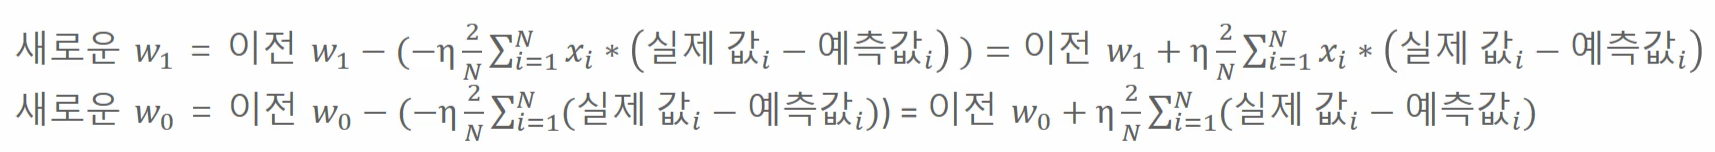